## T-value
The t-value is a test statistic that measures the ratio between the difference in means and the standard error of the difference.

## why type = 2?
In ANOVA type 1 is used for balanced data and typ2 2 is used for unbalanced data

In [21]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [23]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


<AxesSubplot:xlabel='sex', ylabel='tip'>

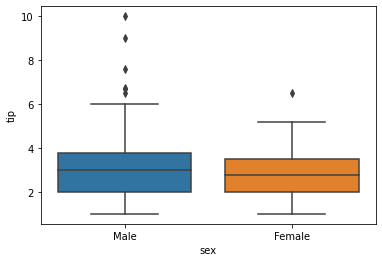

In [24]:
sns.boxplot(x='sex', y='tip',data=tips) #comparision betwwn two categorical variable for one continous

<AxesSubplot:xlabel='size', ylabel='total_bill'>

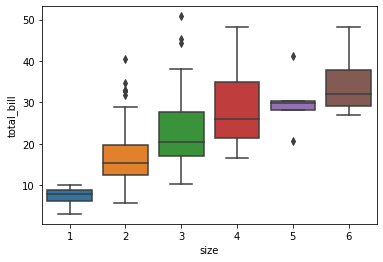

In [25]:
sns.boxplot(x='size', y='total_bill',data=tips)

In [26]:
#stat
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [27]:
# one way ANOVA

mod = ols('tip ~ total_bill', data=tips).fit()

aov_table = sm.stats.anova_lm(mod, type=2) #assignment why type = 2
print(aov_table)

               df      sum_sq     mean_sq           F        PR(>F)
total_bill    1.0  212.423733  212.423733  203.357723  6.692471e-34
Residual    242.0  252.788744    1.044582         NaN           NaN


In [28]:
# tukey test hsd test
import pingouin as pg
aov = pg.anova(data= tips, dv = 'tip', between ='total_bill', detailed=True)
print(aov)

       Source          SS   DF        MS        F    p-unc       np2
0  total_bill  448.167810  228  1.965648  1.72985  0.10982  0.963362
1      Within   17.044667   15  1.136311      NaN      NaN       NaN


In [29]:
# tukey HSD
pt = pg.pairwise_tukey(data= tips, dv= 'total_bill', between='tip')
print(pt)

         A      B  mean(A)    mean(B)       diff        se         T  \
0     1.00   1.01   7.1675  16.990000  -9.822500  7.823029 -1.255588   
1     1.00   1.10   7.1675  12.900000  -5.732500  7.823029 -0.732772   
2     1.00   1.17   7.1675  32.830000 -25.662500  7.823029 -3.280379   
3     1.00   1.25   7.1675   9.696667  -2.529167  5.344146 -0.473259   
4     1.00   1.32   7.1675   9.680000  -2.512500  7.823029 -0.321167   
...    ...    ...      ...        ...        ...       ...       ...   
7498  6.73   9.00  48.2700  48.330000  -0.060000  9.895436 -0.006063   
7499  6.73  10.00  48.2700  50.810000  -2.540000  9.895436 -0.256684   
7500  7.58   9.00  39.4200  48.330000  -8.910000  9.895436 -0.900415   
7501  7.58  10.00  39.4200  50.810000 -11.390000  9.895436 -1.151036   
7502  9.00  10.00  48.3300  50.810000  -2.480000  9.895436 -0.250621   

       p-tukey    hedges  
0     1.000000 -1.020938  
1     1.000000 -0.595829  
2     0.785992 -2.667327  
3     1.000000 -0.304385  
